# Resolução do Titanic do livro Machien Leaning Guia de Matt Harrison



# __Business understanding__



# Titanic: Machine Learning from Disaster

O desafio do Titanic é uma das competições mais famosas, e é promovida pelo site kaggle.com. Tamanha popularidade desta competição fez com que ela fosse considerada como sendo um __Hello, World!__ para o universo fantástico do Data Science (Ciência de Dados).

Com certeza, a maioria de vocês conhece a história por trás do naufrágio deste que seria o navio mais moderno do mundo para a época. Apesar da tecnologia disponível, após colidir com um iceberg em 15 de abril de 1912, __seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.__
<img src="..//docs/titanic.jpeg">

Como principal fator contribuinte, logo se descobriu que não havia botes salva-vidas suficientes para toda a tripulação e passageiros.

Obviamente, aqueles que sobreviveram à tragédia contaram com muita sorte, mas será que alguns grupos de passageiros não tiveram "mais sorte" que outros grupos? Será que crianças e mulheres realmente tiveram mais chances de sobreviver? Será que o Jack teve menos chances de escapar do seu destino trágico que a Rose, só pelo fato de ele ter embarcado na 3ª Classe?

> **Resumidamente, o objetivo deste desafio é utilizar os dados disponíveis para medir a chance de sobrevivência dos passageiros do Titanic.**

## 1. Definição do Problema

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".

A descrição completa da competição, assim como o conjunto de dados, está disponível na página do Kaggle Titanic: Machine Learning from Disaster (<https://www.kaggle.com/c/titanic>).

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

__Objetivo__ 

Espera-se que você consiga fazer **uma análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência** (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

Após analisar os dados, espera-se também que você seja capaz de **construir um modelo que dê a previsão de sobrevivência** para um passageiro qualquer que seja fornecido como input

## 2 - Objetivo

Neste exemplo, queremos criar um modelo preditivo para responder a uma pergunta. Ele classificará se um indivíduo sobrevive à catástrofe do navio Titanic com base nas características individuais e da viagem.

- Nosso modelo deve ser capaz de pegar as informações dos passageiros e prever se um passageiro sobreviveria no Titanic. 

- Nossa intenção é ter uma função que transforme features em um rótulo. Se fôssemos escrever isso como uma fórmula de álgebra, ficaria assim: `y = f(X)`

## 3 -  Importações de bibliotecas

- __Pandas__ - Nos fornece nos fornece as ferramentas para facilitar a manipulação de dados.;
- __Scikit-Learn__ - faz uma ótima modelagem preditiva e é a melhor opção para quem esta começando (como eu);
- __Yellowbrick__ - é uma biblioteca de visualização para avaliação de modelos;
- __matplotlib__ - Aplicada para construção de visualizações (gráficos).



In [ ]:
# manipulação de dados
import pandas as pd
import numpy as np
import janitor as jn
from IPython.core.display import display, HTML

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
display( HTML( '<style>.container { width:100% !important; }</style>') )

# maximiza o número de colunas e linhas para impressão 
# quando do uso da função head() do pandas
pd.options.display.max_columns = 15
pd.options.display.max_rows = 50


# Build model
from sklearn import ensemble, tree, preprocessing
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
from yellowbrick.model_selection import LearningCurve 
from xgboost import XGBClassifier

# __Data understanding__

### Data Dictionary:

* __Pclass:__ Classe do bilhete
    - 1 = 1ª Classe
    - 2 = 2ª Classe
    - 3 = 3ª Classe
* __Survived:__ Informa se o passageiro sobreviveu ao desastre
  - 0 = Não
  - 1 = Sim
* __Name:__ Nome do passageiro
* __Sex:__ Sexo do passageiro
* __Age:__ Idade do passageiro
* __SibSp:__ Quantidade de cônjuges e irmãos a bordo
* __Parch:__ Quantidade de pais e filhos a bordo
* __Ticket:__ Número da passagem
* __Fare:__ Preço da Passagem
* __Cabin:__ Número da cabine do passageiro
* __Embarked:__ Porto no qual o passageiro embarcou
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton
* __boat__ - Lifeboat (Botes que sobreviveram)
* __body__ - Corpos identificados


**Notas Variáveis**
pclass: Classe do bilhete
> 1º = Superior
2º = Médio
3º = Inferior

**Age**: a idade é fracionária se for menor que 1. Se a idade for estimada, ela está na forma de xx,5

**sibsp:** O conjunto de dados define as relações familiares desta forma...
-  __Sibling =__ irmão, irmã, meio-irmão, meia-irmã
- __Spouse =__ marido, esposa (amantes e noivos foram ignorados)

__parch:__ O conjunto de dados define as relações familiares dessa maneira...
- __Parent =__ mãe, pai
- __Child =__ filha, filho, enteada, enteado
- __Algumas crianças__ viajavam apenas com uma babá, portanto parch=0 para elas.
- __home.dest: Lar/Destino

# __Data preparation__



## 1 -  Coleta dos daos

In [37]:
url = "https://hbiostat.org/data/repo/titanic3.xls"
df = pd.read_excel(url).clean_names()
orig_df = pd.read_excel(url).clean_names()

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
orig_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 2 - Limpando os dados

Depose do dataset precisamos pré-prepará-lo:
- Os atributos devem ser numéricos (inteiros ou ponto flutuante);
- Muitos valores falham caso recebam valores ausentes;
- Aulguns modelos terão melhor desempenho se os dados tiverem padronizados __standardized__(escalonamento/normalizão);
- Este dataset contém atributos que provocam __vazamento__ de informações (leaky features) - Os recursos com vazamento são variáveis que contêm informações sobre o futuro ou destino.


In [5]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home_dest     object
dtype: object

Tipos string (object) deverão ser convertidos em númemos.

vamos gerar um resumo dos dataser usando a biblioteca pandas_profiling

In [6]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(df)
profile.to_file(r"../repots/repot_titanic.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
# verifcando qt de linhas e colunas
df.shape

(1309, 14)

In [39]:
df.describe() # Exibindo apenas as duas primeira colunas 

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Text(0, 0.5, 'people for Age')

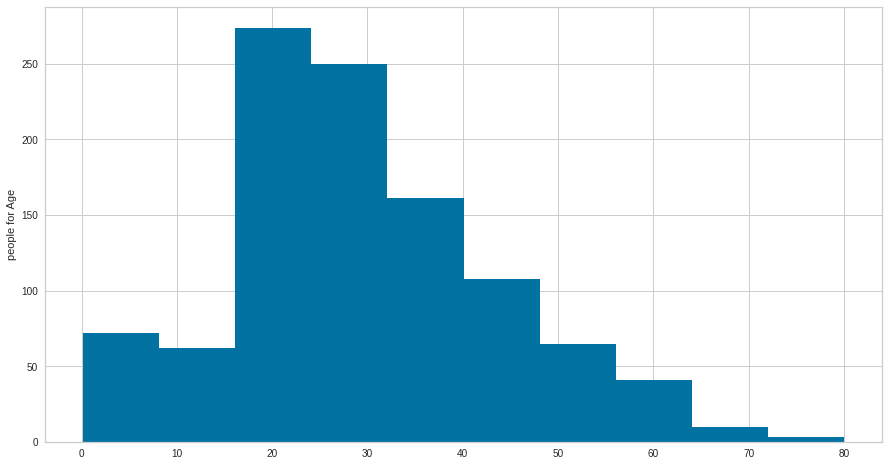

In [40]:
# verificando os dados ausente do campo idade (age)
ax = df['age'].plot(kind='hist', figsize=(15,8))
ax.set_ylabel('people for Age')

In [41]:
# total de dados ausentes com df.isnull().sum()
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64

In [42]:
#verificando quais colunas tem nulo
df.isnull().sum(axis=1).loc[:10]

0     1
1     1
2     2
3     1
4     2
5     1
6     1
7     2
8     1
9     2
10    1
dtype: int64

In [43]:
# percentual de dados ausentes isnull().mean()
df.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home_dest    0.430863
dtype: float64

### __OBESERVAÇẼOS SOBRE A ANÁLISE DOS DADOS NULOS__

1. __Age__: 20% dos dados são nulos, porém é um dado relevante já que crianças tinham preferencias para entrar nos botes;
2. __(Cabin, boat e body)__: tendem a não serem relevantes e serão __Deletados__;
3. __Body__: Além de não ser relevante possuem vazamento de informação já que informa quem morreu, o que pode gerar um viés e *dificultar o escalonamento do modelo*, este é mais um motivo para deletar.
***Atenção:***Se estivermos criando um modelo para prever se um passageiro morreria, saber que ele tinha um número de identificação corporal a priori nos informaria que já estava morto. Queremos que nosso modelo não conheça essas informações e faça a previsão com base nas outras colunas, pois queremos testar um modelo escalavel sem viés.)
4. __Boat__ é mesmo caso da feature body, causa vazamento pois indica quem não morreu e isso não nos interessa, vamos exluir esta coluna.


Vejamos algumas das linhas com dados ausentes. Podemos criar um array booleano (uma série com True ou False para indicar se a linha possui dados ausentes) e usá-la para inspecionar as linhas com dados ausentes:

In [44]:
mask = df.isnull().any(axis=1) 
mask.head() # rows

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [45]:
df[mask].body.head()

0      NaN
1      NaN
2      NaN
3    135.0
4      NaN
Name: body, dtype: float64

Para colunas de objetos que acreditamos serem categóricas, usaremos o método value_counts() para examinar as contagens dos valores:

In [46]:
df['sex'].value_counts(dropna=False) # dropna False inclui os valores nulos na contagem

male      843
female    466
Name: sex, dtype: int64

Text(0.5, 1.0, 'Contagem por Sexo')

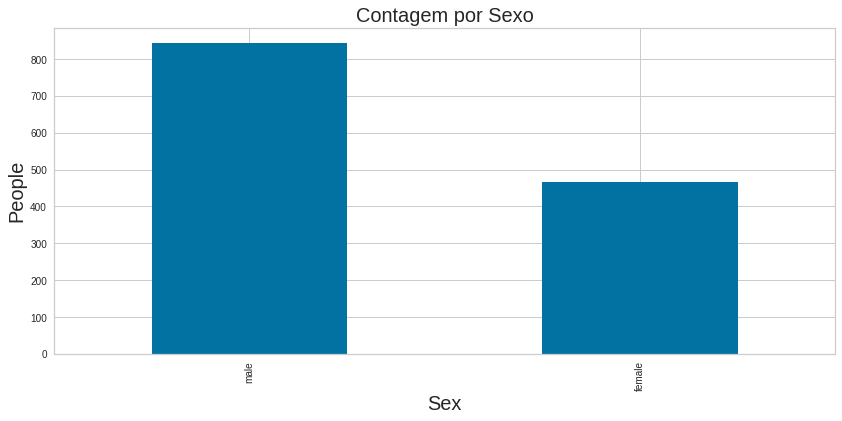

In [21]:
# GRÁFIO DE BARRAS
ax = df['sex'].value_counts(dropna=False).plot(kind='bar', figsize=(14,6))
ax.set_ylabel('People', fontsize=20)
ax.set_xlabel("Sex",fontsize=20)
plt.title("Contagem por Sexo", fontsize=  20)

Text(0.5, 1.0, 'Contagem por Local de Embarque')

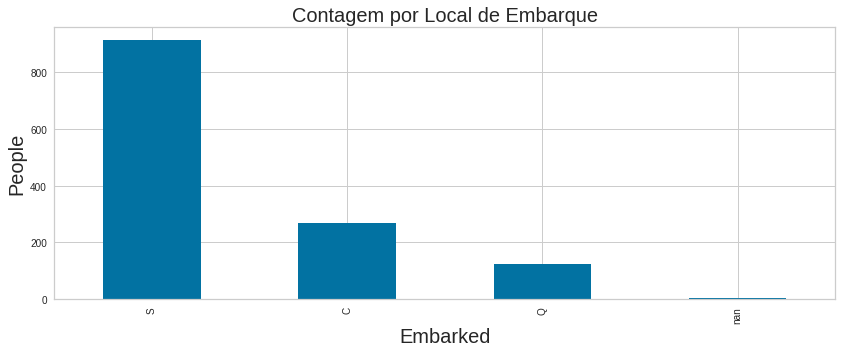

In [24]:
# embarked  -  vamos preencher com o valor que mais repete
ax = df['embarked'].value_counts(dropna=False).plot(kind = 'bar', figsize=(14,5))
ax.set_ylabel('People', fontsize=20)
ax.set_xlabel("Embarked",fontsize=20)
plt.title('Contagem por Local de Embarque', fontsize=20)

## 3 - Criando as Features que serão trabalhadas

- O campo nome apesar de conter o titulo da pessoas (que poderia ser uma fature) nós não vmaos usa-lo, pois teoricamente não traz quse nenhum valor para o mdelo visto que é único.
- vamos excluir tabém as colunas que causam vazamento de dados que são ticket, Home.destm boat, cabin.

**Exlcuindos colunas com vazamento de informações**

In [47]:
# consultando o campo nome, Veaj que o titulo seria um feature interessante, mas nesta primeira versão não vamos usa-la.
name = df.name
name.head(3)

0     Allen, Miss. Elisabeth Walton
1    Allison, Master. Hudson Trevor
2      Allison, Miss. Helen Loraine
Name: name, dtype: object

In [19]:
## Excluindo as colunas
df.drop(
    columns=[
        "name", 
        "ticket", 
        "home_dest", 
        "boat", 
        "body", 
        "cabin"], 
    inplace=True
)

In [61]:
df

,pclass,survived,age,sibsp,parch,fare,body,...,"home_dest_Winnipeg, MN","home_dest_Woodford County, KY","home_dest_Worcester, England","home_dest_Worcester, MA","home_dest_Yoevil, England / Cottage Grove, OR","home_dest_Youngstown, OH","home_dest_Zurich, Switzerland"
0,1,1,29.0000,0,0,211.3375,NaN,...,0,0,0,0,0,0,0
1,1,1,0.9167,1,2,151.5500,NaN,...,0,0,0,0,0,0,0
2,1,0,2.0000,1,2,151.5500,NaN,...,0,0,0,0,0,0,0
3,1,0,30.0000,1,2,151.5500,135.0,...,0,0,0,0,0,0,0
4,1,0,25.0000,1,2,151.5500,NaN,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,328.0,...,0,0,0,0,0,0,0
1305,3,0,NaN,1,0,14.4542,NaN,...,0,0,0,0,0,0,0
1306,3,0,26.5000,0,0,7.2250,304.0,...,0,0,0,0,0,0,0
1307,3,0,27.0000,0,0,7.2250,NaN,...,0,0,0,0,0,0,0


In [60]:
df.drop(columns=["name"])

KeyError: "['name'] not found in axis"

**Criando Células Dammies** 

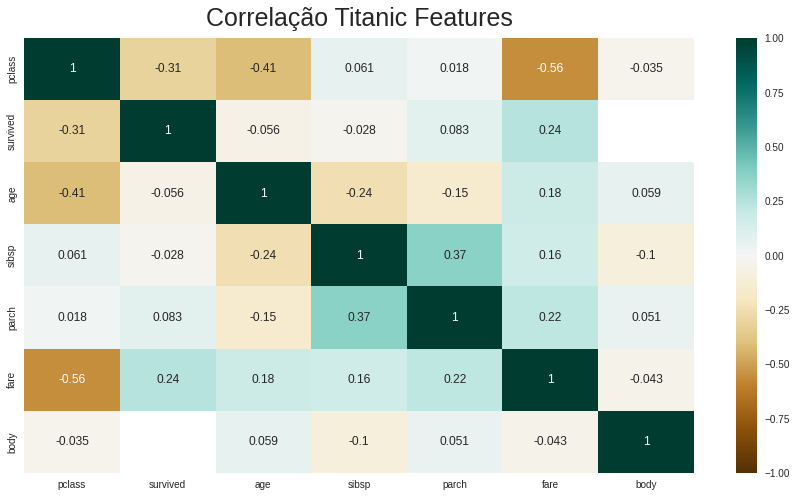

In [51]:
plt.figure(figsize=(15,8))
headtmap = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='BrBG',annot_kws={'size':12})
headtmap.set_title("Correlação Titanic Features", fontdict={"fontsize": 25}, pad=12)
plt.savefig(r"../visualizion/correlation_titanic.png", dpi=300, bbox_inches="tight")

__Atenção__:Precisamos criar colunas `dummy` a partir de colunas de strings. Isso vai criar novas colunas para sexo e embarcado. Pandas tem uma função `get_dummies` conveniente para isso:

In [54]:
df = pd.get_dummies(df)
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body',
       'name_Abbing, Mr. Anthony', 'name_Abbott, Master. Eugene Joseph',
       'name_Abbott, Mr. Rossmore Edward',
       ...
       'home_dest_Wimbledon Park, London / Hayling Island, Hants',
       'home_dest_Windsor, England New York, NY', 'home_dest_Winnipeg, MB',
       'home_dest_Winnipeg, MN', 'home_dest_Woodford County, KY',
       'home_dest_Worcester, England', 'home_dest_Worcester, MA',
       'home_dest_Yoevil, England / Cottage Grove, OR',
       'home_dest_Youngstown, OH', 'home_dest_Zurich, Switzerland'],
      dtype='object', length=2841)

KeyboardInterrupt: 

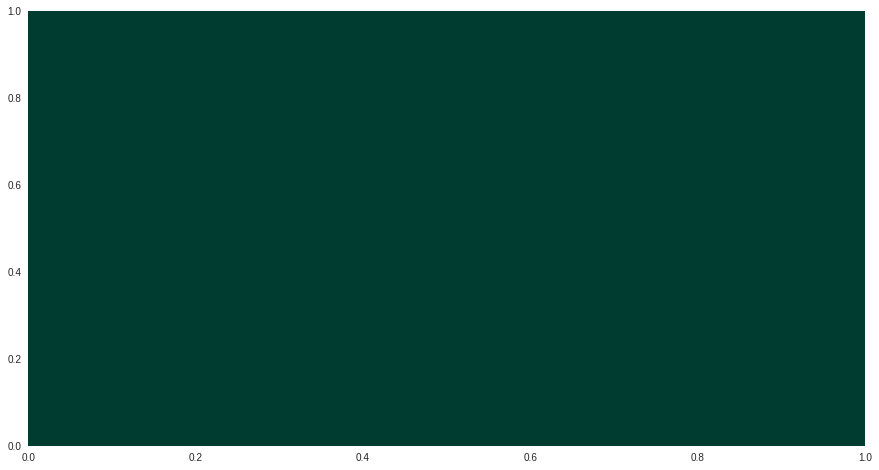

In [53]:
plt.figure(figsize=(15,8))
headtmap = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='BrBG',annot_kws={'size':12})
headtmap.set_title("Correlação Titanic Features", fontdict={"fontsize": 25}, pad=12)
plt.savefig(r"../visualizion/correlation_titanic.png", dpi=300, bbox_inches="tight")

Neste ponto, as colunas sex_male e sex_female estão perfeitamente correlacionadas inversamente. Normalmente, removemos quaisquer colunas com correlação positiva ou negativa perfeita ou muito alta. A multicolinearidade pode afetar a interpretação da importância e dos coeficientes do recurso em alguns modelos. Aqui está o código para remover a coluna sex_male:

In [30]:
df.drop(columns="sex_male", inplace=True)

In [24]:
#Outra forma de reduzir um coluna dummies seria:

df = pd.get_dummies(df,drop_first=True)

In [25]:
df.columns 

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

## 4 - Separe  as amostras de teste e treino

In [26]:
# Variaveis resposta (target)
y = df['survived']

# Variáveis explicativas (feastures)
X = df.drop(columns='survived')

In [27]:
# ou você pode fazer
import janitor as jn
X,y = jn.get_features_targets(df, target_column_names="survived") 

/home/anselmo/anaconda3/lib/python3.9/site-packages/janitor/utils.py:263: FutureWarning: get_features_targets() has moved. Please use ml.get_features_targets().
  warnings.warn(message, FutureWarning)


In [28]:
X.shape

(1309, 9)

Sempre quermemos treinar e testar em dados diferentes. Caso contrário, você realmente não saberá o quão bem seu modelo generaliza para dados que não viu antes.

Usaremos scikit-learn para extrair 30% para teste (usando random_state=42 para remover um elemento de aleatoriedade se começarmos a comparar modelos diferentes):

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=42
)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 9), (393, 9), (916,), (393,))

In [31]:
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')

##  5 - Imputação de dados nas colunas com dados NaN que serão usados no modelo (Age, Fare)

A coluna de idade tem valores ausentes. Precisamos imputar a idade dos valores numéricos. Queremos apenas imputar no conjunto de treinamento e usar esse imputador para preencher a data do conjunto de teste. Caso contrário, estamos vazando dados (enganando ao fornecer informações futuras ao modelo).

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute 

#colunas que serão preenchidas
num_cols = [ 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female']

imputer = impute.IterativeImputer()

# impudando dados na base treino
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed

# imputando dados na base de teste
imputed = imputer.fit_transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed


In [33]:
# usando a mediana
meds =X_train.median()
X_train = X_train.fillna(meds)
X_test = X_test.fillna(meds)

In [34]:
X_train.shape

(916, 9)

# 3 - Data preparation



## 1 - Normalizar dados

Normalizar ou pré-processar os dados ajudará muitos modelos a ter um melhor desempenho depois que isso for feito. Particularmente aqueles que dependem de uma métrica de distância para determinar a similaridade. (Observe que os modelos de árvore, que tratam cada recurso separadamente, não têm esse requisito.)

Vamos padronizar os dados para o pré-processamento.

__Standardizing__ (Normalizar) está traduzindo os dados para que tenham um valor médio de zero e um desvio padrão de um. Dessa forma, os modelos não tratam variáveis com escalas maiores como mais importantes do que variáveis com escalas menores. Vou colocar o resultado (matriz numpy) de volta em um DataFrame pandas para facilitar a manipulação (e manter os nomes das colunas).

Eu também normalmente não padronizo colunas fictícias, então vou ignorá-las:

In [35]:
from sklearn.preprocessing import StandardScaler

cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female','embarked_C',
        'embarked_Q','embarked_S']

# modelo
scaler = StandardScaler()

# Transformação  base de treino
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = cols)

# transformmação base de teste
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = cols)


In [36]:
X_train.head() # os números estão variando entre 0 e 1

,pclass,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
0,0.825248,-0.128878,-0.498616,-0.432553,-0.473599,-0.739795,-0.506474,-0.330089,0.660104
1,0.825248,-0.205639,-0.498616,-0.432553,-0.488120,-0.739795,-0.506474,-0.330089,0.660104
2,-0.363317,-0.751431,-0.498616,-0.432553,-0.145224,1.351725,-0.506474,-0.330089,0.660104
3,0.825248,-2.198733,6.897852,1.805972,0.679618,1.351725,-0.506474,-0.330089,0.660104
4,0.825248,-0.049698,-0.498616,-0.432553,-0.490408,1.351725,-0.506474,-0.330089,0.660104


In [37]:
X_test.head()

,pclass,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
0,0.882021,0.276094,-0.433273,-0.479750,-0.513001,-0.752155,-0.517438,-0.302765,0.651086
1,0.882021,-0.768999,0.637647,0.777195,-0.337639,-0.752155,1.932599,-0.302765,-1.535895
2,0.882021,-0.204536,-0.433273,-0.479750,-0.497314,-0.752155,-0.517438,-0.302765,0.651086
3,0.882021,-0.204205,-0.433273,-0.479750,-0.494176,-0.752155,-0.517438,-0.302765,0.651086
4,0.882021,-0.204849,-0.433273,-0.479750,-0.500281,-0.752155,-0.517438,3.302891,-1.535895


## 2 - Refatore

para faciliar no futuro, vamos criar duas funções. Uma para limpeza geral eoutra para fazer a divisão entre so conjuntos de treino e teste.

Função: `tweak_titanic(df)`

In [38]:
def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home_dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

Função: `get_train_test_X_y`

In [39]:
def get_train_test_X_y(df, y_col, size=0.3, std_cols=None):
    from sklearn.model_selection import train_test_split
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=size, random_state=42)
    cols = X.columns 
    num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']
    fi = impute.IterativeImputer()
    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test 

In [40]:
# testando as funções
ti_df =tweak_titanic(orig_df)

In [41]:
std_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']
get_train_test_X_y(ti_df, "survived", std_cols=std_cols)

(        pclass       age     sibsp     parch      fare  sex_male  embarked_Q  \
 1214  0.825248 -0.167248 -0.498616 -0.432553 -0.473625         1           0   
 677   0.825248 -0.205255 -0.498616 -0.432553 -0.488146         1           0   
 534  -0.363317 -0.751526 -0.498616 -0.432553 -0.145246         0           0   
 1174  0.825248 -2.153148  6.897852  1.805972  0.679608         0           0   
 864   0.825248 -0.049178 -0.498616 -0.432553 -0.490434         0           0   
 ...        ...       ...       ...       ...       ...       ...         ...   
 1095  0.825248 -0.166508 -0.498616 -0.432553 -0.493196         0           1   
 1130  0.825248 -0.829564 -0.498616 -0.432553 -0.490434         0           0   
 1294  0.825248 -0.010159 -0.498616 -0.432553 -0.332756         1           0   
 860   0.825248 -0.205255 -0.498616 -0.432553 -0.487593         0           0   
 1126  0.825248 -0.049178 -0.498616 -0.432553 -0.488146         0           0   
 
       embarked_S  
 1214 

In [42]:
orig_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# 4 -  Modeling



## 1 - baseline maodel

Criar uma __Baseline__  que faça algo realmente simples, pode nos dar algo para comparar nosso modelo. 

Observe que usar o 'default.score' padrão nos dá a precisão que pode ser enganosa. Um problema em que um caso positivo é 1 em 10.000 pode facilmente obter mais de 99% de precisão ao prever sempre o negativo.

In [47]:
from sklearn.dummy import DummyClassifier
#modelo
dm_model = DummyClassifier()

#trieno
dm_model.fit(X_train, y_train)

# resultado
dm_previsao = dm_model.predict(X_test)

#accuracy
dm_model.score(X_test, y_test)

0.5699745547073791

In [48]:
# Prescion
from sklearn.metrics import precision_score

precision_score(y_test, dm_previsao)

/home/anselmo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

## 2 - Aplicando vários modelos

Aqui usamos algumas famílias diferentes e comparamos a pontuação AUC e o desvio padrão usando validação cruzada k-fold. Um algoritmo que tenha uma pontuação média um pouco menor, mas um desvio padrão mais apertado, pode ser uma escolha melhor.

Como estamos usando validação cruzada __k-fold__, alimentaremos o modelo com todos os valores de X e y:

In [49]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [50]:
# biliotecas 
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
import xgboost


In [69]:
# Multiplos Modelo
from sklearn.model_selection import KFold, cross_val_score
    # modelo
for model in [
    DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    xgboost.XGBClassifier
]:
    #treino
    cls = model()
    kfold = KFold(n_splits=10, random_state= 43, shuffle=True)
    
    # Avaliação
    s = cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold)
    
    #visualizção
    print(
        f"{model.__name__:22}  AUC "
        f"{s.mean():.3f} STD: {s.std():.2f}"        
    )
    

DummyClassifier         AUC 0.500 STD: 0.00
LogisticRegression      AUC 0.840 STD: 0.03
DecisionTreeClassifier  AUC 0.749 STD: 0.03
KNeighborsClassifier    AUC 0.832 STD: 0.03
GaussianNB              AUC 0.808 STD: 0.03
SVC                     AUC 0.837 STD: 0.03
RandomForestClassifier  AUC 0.839 STD: 0.03
[12:57:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[12:57:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[12:57:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[12:57:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:57:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option us

[12:57:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier           AUC 0.842 STD: 0.03


/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/anselmo/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## 3 - Stacking

Um classificador __stacking__ pega outros modelos e usa sua saída para prever um destino ou rótulo. Usaremos as saídas dos modelos anteriores e as combinaremos para ver se um classificador de empilhamento pode fazer melhor:


In [81]:
# biblioteca
from mlxtend.classifier import StackingClassifier

#modelo
clfs = [
    x()
    for x in [
        LogisticRegression,
        DecisionTreeClassifier,
        KNeighborsClassifier,
        GaussianNB,
        SVC,
        RandomForestClassifier
    ]
]
# aplicando o Stacking
#modelo
stack = StackingClassifier(
    classifiers=clfs,
    meta_classifier=LogisticRegression()
)
#treino
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# metricas
s = cross_val_score(stack, X,y, scoring="roc_auc", cv=kfold)

#visualização
print(
    f"{stack.__class__.__name__} "
    f"AUC: {s.mean():.3f} STD: {s.std():.2f}" 
)


StackingClassifier AUC: 0.808 STD: 0.02


__Atenção:__ Neste caso, parece que o desempenho caiu um pouco, assim como o desvio padrão.

## 4 - Criando o modelo ( usarei RandFlorest)

In [119]:
#modelo 
from sklearn.ensemble import RandomForestClassifier
rf_modelo = RandomForestClassifier(n_estimators = 100,
                          random_state=42)

#treino
rf_modelo.fit(X_train, y_train)

# resultodo
rf_previsao = xgb_modelo.predict(X_test)

# 5-  Evaluation

## 1 - Métricas

Agora que temos um modelo, podemos usar os dados de teste para ver quão bem o modelo se generaliza para dados que não viu antes.

O método __.score__ devolve a média da precisão da predição:

In [120]:
rf_modelo.score(X_test, y_test)

0.816793893129771

Também podemos olhar para outras métricas, como __prescision__:

In [122]:
precision_score(y_test, rf_previsao)

0.8615384615384616

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_previsao))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       224
           1       0.86      0.66      0.75       169

    accuracy                           0.81       393
   macro avg       0.82      0.79      0.80       393
weighted avg       0.82      0.81      0.80       393



Um bom benefício dos modelos baseados em árvore é que você pode inspecionar a importância da __feature__. A importância da __feature__ informa o quanto uma __feature__ contribui para o modelo. Observe que remover uma __feature__ não significa que a pontuação diminuirá de acordo, pois outras __features__ podem ser colineares (*neste caso, poderíamos remover a coluna sex_male ou sex_female*, pois elas têm uma correlação negativa perfeita):

In [124]:
for col, val in sorted(
    zip(
        X_train.columns, 
        rf_modelo.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse = True,
)[:5]:
    print(f"{col:10}{val:10.3}")


age            0.281
fare           0.263
sex_female     0.241
pclass        0.0902
sibsp         0.0489


**ATENÇÃO:**
A importância do recurso é calculada observando o aumento do erro. Se a remoção de um recurso aumenta o erro no modelo, o recurso é mais importante.

Eu realmente gosto da biblioteca __SHAP__ para explorar o que __features__ um modelo considera importante e para explicar previsões. Esta biblioteca funciona com modelos de caixa preta.

## 2 - Otimzando o Modelo (GRID SEARCH)
Os modelos têm hiperparâmetros que controlam como eles se comportam. Variando os valores desses parâmetros, alteramos seu desempenho. O Sklearn possui uma classe de pesquisa de grade(`GRID SEARCH`) para avaliar um modelo com diferentes combinações de parâmetros e retornar o melhor resultado. Podemos usar esses parâmetros para instanciar o modelo
a classe do modelo:


In [133]:
from sklearn.model_selection import GridSearchCV

rf_modelo2 = RandomForestClassifier()
params = {
    "max_features": [0.4, "auto"],
    "n_estimators": [15, 200],
    "min_samples_leaf": [1, 0.1],
    "random_state": [42],
}

# modelo grid
grid_cv = GridSearchCV( rf_modelo2, params, n_jobs=-1)

# Treino
grid_cv.fit(X_train, y_train)

#imprimindo os melhores parametros
print(grid_cv.best_params_)

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


In [210]:
#Retreinando o modelo
rf_modelo5 = RandomForestClassifier(
    **{
        "max_features": "auto",
        "n_estimators":  200,
        "min_samples_leaf": 0.1,
        "random_state": 42,
    }
)
rf_modelo5.fit(X_train, y_train)
rf_modelo5.score(X_test, y_test)

0.712468193384224

Podemos passar um parâmetro de pontuação para GridSearchCV para otimizar diferentes métricas.

## 3 - Matrix de Confusão

Uma matriz de confusão nos permite ver as classificações corretas, bem como falsos positivos e falsos negativos. Pode ser que queiramos otimizar para falsos positivos ou falsos negativos, e diferentes modelos ou parâmetros podem alterar isso. Podemos usar `sklearn` ou `yellowbric`

### Sklearn 
    (plot_confusion_matrix)

/home/anselmo/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


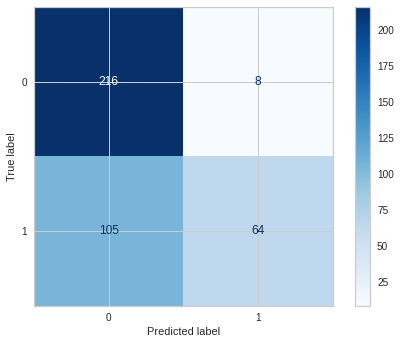

In [211]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_modelo5, X_test,y_test, cmap="Blues")

### YellowBrick 

/home/anselmo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


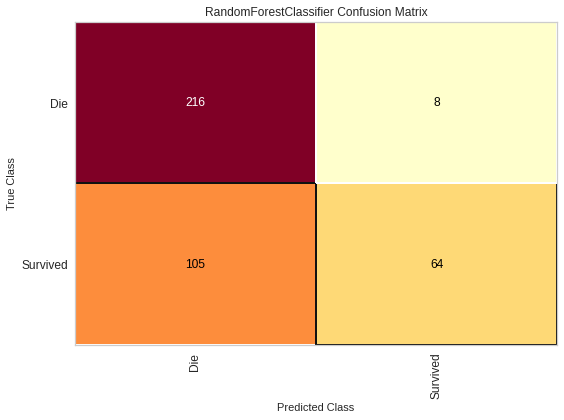

In [212]:
from yellowbrick.classifier import ConfusionMatrix

mapping = {0:"died",1:"survived"}
fig, ax = plt.subplots(figsize=(8,6))
cm = ConfusionMatrix(rf_modelo5, 
                     classes=["Die","Survived"],
                     label_encoder= mapping)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()
fig.savefig(r"../src/visualization/cm_rf_modelo.png")

## 4 -Curva ROC

Um gráfico de __receiver operating characteristic (ROC)__ é uma ferramenta comum, usada para avaliar classificadores. Ao medir a área sob a curva (AUC), podemos obter uma métrica para comparar diferentes classificadores (veja a figura). Ele plota a taxa de verdadeiros positivos em relação à taxa de falsos positivos. Podemos usar sklearn para calcular a AUC:
 


### Sklearn

In [213]:
from sklearn.metrics import roc_auc_score
y_pred =  rf_modelo5.predict(X_test)
roc_auc_score(y_test,  y_pred)

0.6714919695688927

### Yelowbrick

/home/anselmo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


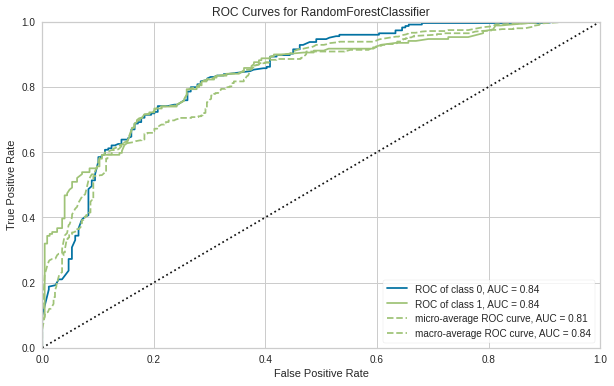

In [214]:
fig, ax = plt.subplots(figsize=(10,6))
roc = ROCAUC(rf_modelo5)
roc.fit(X_train, y_train)
roc.score(X_test,y_test)
roc.poof()
roc.show()
fig.savefig("../docs/ROC_Curves_titanic_Matt.png")


## 5 - Curva de aprendizado

Uma curva de aprendizado é usada para nos dizer se temos dados de treinamento suficientes. Ele treina o modelo com partes crescentes dos dados e mede a pontuação. Se a pontuação da validação cruzada continuar subindo, talvez precisemos investir na coleta de mais dados. Aqui está um exemplo de Yellowbrick:

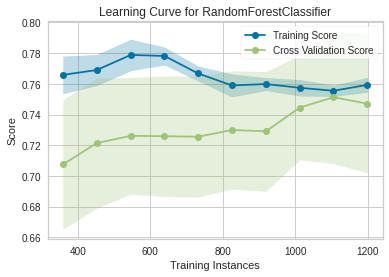

In [215]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

fig, ax = plt.subplots(figsize=(6,4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3,1.0,10)
lc = LearningCurve(rf_modelo5,
                    cv=cv, 
                    train_sizes=sizes,
                    scoring="f1_weighted", 
                    n_jobs=4,
                    ax=ax
                   )
lc.fit(X,y)
lc.poof()
lc.show()
fig.savefig("../docs/learningCurve_titanic.png")

# 6 -  Deployment

# 1 - Implante o modelo

Usando o módulo pickle do Python, podemos persistir modelos e carregá-los. Uma vez que temos um modelo, chamamos o método .predict para obter um resultado de classificação ou regressão:


In [216]:
import pickle

pickle_titanic = pickle.dumps(rf_modelo5)
rf_modelo6 = pickle.loads(pickle_titanic)
y_pred = rf_modelo6.predict(X_test)
#roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79       224
           1       0.89      0.38      0.53       169

    accuracy                           0.71       393
   macro avg       0.78      0.67      0.66       393
weighted avg       0.77      0.71      0.68       393

